DATA WRANGLING

In this part of the project, after an exhaustive EDA, we should start preprocessing, selecting and normalizing the main features of our final dataset. Same processes as Linear Regression but this time applying a different approach.

Preprocessing of the Data

When we talk about data preprocessing, we are referring to these type of things:
    
    1. Empty columns with NaN's, Null values or categorical columns.
    
    2. String data stored in numerical columns or numerical data stored in string's columns
    
    3. Negative values in columns where it doesn't make sense to have them, for example porosity and permeability columns. (not the case)
    
    4. Theorically incorrect values
    
    5. Water injection volume rows.
    
    6. Zero values of target variables (Oil production rate & Gas production rate).

In this particular case, I will use a different approach. When I was doing the EDA I realized that two producer wells were not producing anything for more than 20 percent of their lifetime. For that reason, I will ignore those wells in the Polynomial Regression application since the reason mentioned before means a considerable amount of outliers and, this particular algorithm is very sensitive working with outliers. Also, I will ignore the water injection data, but this time I will do that creating a new dataframe with the range of my neccesary data.

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#!pip install xlrd==1.2.0
# !pip install -U scikit-learn
# !pip install XlsxWriter

Matplotlib is building the font cache; this may take a moment.


In [2]:
#Import the xls production file using pandas 
prod_df2=pd.read_excel('Daily Production.xls')
prod_df2

,DATEPRD,WELL_BORE_CODE,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,NPD_FIELD_CODE,NPD_FIELD_NAME,NPD_FACILITY_CODE,NPD_FACILITY_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,...,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
0,2014-04-07,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,0.00000,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,WI
1,2014-04-08,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
2,2014-04-09,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
3,2014-04-10,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
4,2014-04-11,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,310.37614,...,%,33.09788,10.47992,33.07195,0.0,0.0,0.0,NaN,production,OP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15629,2016-09-14,NO 15/9-F-5 AH,5769,15/9-F-5,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.07776,0.22879,0.01862,0.0,0.0,0.0,NaN,production,OP
15630,2016-09-15,NO 15/9-F-5 AH,5769,15/9-F-5,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.08545,0.22914,0.00631,0.0,0.0,0.0,NaN,production,OP
15631,2016-09-16,NO 15/9-F-5 AH,5769,15/9-F-5,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.08544,0.22896,0.01181,0.0,0.0,0.0,NaN,production,OP
15632,2016-09-17,NO 15/9-F-5 AH,5769,15/9-F-5,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.07497,0.22846,0.02576,0.0,0.0,0.0,NaN,production,OP


In [3]:
#Roundinf off the data to the nearest integer
prod_df2 = np.round(prod_df2)
prod_df2

,DATEPRD,WELL_BORE_CODE,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,NPD_FIELD_CODE,NPD_FIELD_NAME,NPD_FACILITY_CODE,NPD_FACILITY_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,...,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
0,2014-04-07,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,0.0,...,%,0.0,0.0,0.0,0.0,0.0,0.0,NaN,production,WI
1,2014-04-08,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.0,0.0,0.0,0.0,0.0,0.0,NaN,production,OP
2,2014-04-09,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.0,0.0,0.0,0.0,0.0,0.0,NaN,production,OP
3,2014-04-10,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.0,0.0,0.0,0.0,0.0,0.0,NaN,production,OP
4,2014-04-11,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,310.0,...,%,33.0,10.0,33.0,0.0,0.0,0.0,NaN,production,OP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15629,2016-09-14,NO 15/9-F-5 AH,5769,15/9-F-5,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.0,0.0,0.0,0.0,0.0,0.0,NaN,production,OP
15630,2016-09-15,NO 15/9-F-5 AH,5769,15/9-F-5,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.0,0.0,0.0,0.0,0.0,0.0,NaN,production,OP
15631,2016-09-16,NO 15/9-F-5 AH,5769,15/9-F-5,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.0,0.0,0.0,0.0,0.0,0.0,NaN,production,OP
15632,2016-09-17,NO 15/9-F-5 AH,5769,15/9-F-5,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.0,0.0,0.0,0.0,0.0,0.0,NaN,production,OP


In [4]:
#Dropping categorical columns and useless columns for this analysis
to_drop = ['WELL_BORE_CODE',
'NPD_WELL_BORE_NAME',           
'NPD_FIELD_CODE',
'NPD_FIELD_NAME',
'NPD_FACILITY_CODE',
'NPD_FACILITY_NAME',
'AVG_DOWNHOLE_PRESSURE',
'AVG_DP_TUBING',
'BORE_WI_VOL',
'AVG_CHOKE_UOM',         
'FLOW_KIND',
'WELL_TYPE',
'BORE_GAS_VOL',
'DP_CHOKE_SIZE',
'BORE_WAT_VOL']          
prod_df2.drop(to_drop, inplace=True, axis=1)

In [5]:
prod_df2

,DATEPRD,NPD_WELL_BORE_CODE,ON_STREAM_HRS,AVG_DOWNHOLE_TEMPERATURE,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,BORE_OIL_VOL
0,2014-04-07,7405,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2014-04-08,7405,0.0,NaN,0.0,1.0,0.0,0.0,0.0
2,2014-04-09,7405,0.0,NaN,0.0,1.0,0.0,0.0,0.0
3,2014-04-10,7405,0.0,NaN,0.0,1.0,0.0,0.0,0.0
4,2014-04-11,7405,0.0,97.0,0.0,1.0,33.0,10.0,0.0
...,...,...,...,...,...,...,...,...,...
15629,2016-09-14,5769,0.0,NaN,0.0,1.0,0.0,0.0,0.0
15630,2016-09-15,5769,0.0,NaN,0.0,1.0,0.0,0.0,0.0
15631,2016-09-16,5769,0.0,NaN,0.0,1.0,0.0,0.0,0.0
15632,2016-09-17,5769,0.0,NaN,0.0,1.0,0.0,0.0,0.0


In [9]:
#Exporting my first dataframe into a MS Excel sheet
from xlsxwriter import Workbook
datatoexcel=pd.ExcelWriter("First_DataFrame_PolynomialRegression.xlsx", engine='xlsxwriter')
prod_df2.to_excel(datatoexcel, sheet_name='Sheet1')
datatoexcel.save()

In [14]:
#Using interpolate function to fill the NaN values
prod_df2=prod_df2.interpolate(method='pad')
prod_df2

,DATEPRD,NPD_WELL_BORE_CODE,ON_STREAM_HRS,AVG_DOWNHOLE_TEMPERATURE,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,BORE_OIL_VOL
0,2014-04-07,7405,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2014-04-08,7405,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2014-04-09,7405,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,2014-04-10,7405,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2014-04-11,7405,0.0,97.0,0.0,1.0,33.0,10.0,0.0
...,...,...,...,...,...,...,...,...,...
15629,2016-09-14,5769,0.0,90.0,0.0,1.0,0.0,0.0,0.0
15630,2016-09-15,5769,0.0,90.0,0.0,1.0,0.0,0.0,0.0
15631,2016-09-16,5769,0.0,90.0,0.0,1.0,0.0,0.0,0.0
15632,2016-09-17,5769,0.0,90.0,0.0,1.0,0.0,0.0,0.0


In [15]:
#Exporting my interpolated dataframe into a MS Excel sheet
datatoexcel=pd.ExcelWriter("Dataframe_Interpolate_PolynomialRegression.xlsx", engine='xlsxwriter')
prod_df2.to_excel(datatoexcel, sheet_name='Sheet1')
datatoexcel.save()

Data Scaling

Data scaling in general is applied as data preparation for machine learning. The goal of this scaling is to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information. I will transform the data such that the features are withing a specific range [0,1].

In [16]:
#Scaling dataset to remove difference in distributions within columns
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
prod_df2[['ON_STREAM_HRS','AVG_DOWNHOLE_TEMPERATURE','AVG_ANNULUS_PRESS','AVG_CHOKE_SIZE_P','AVG_WHP_P','AVG_WHT_P']] = scaler.fit_transform(prod_df2[['ON_STREAM_HRS', 'AVG_DOWNHOLE_TEMPERATURE','AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P','AVG_WHP_P', 'AVG_WHT_P']])

In [17]:
#Taking the data of wells 2 to 4 since they were the ones with the least number of missing values
newdf = prod_df2.loc[746 : 8022]
X = newdf.drop(['BORE_OIL_VOL'], axis=1)
y = newdf[['BORE_OIL_VOL', 'NPD_WELL_BORE_CODE']]
newdf

,DATEPRD,NPD_WELL_BORE_CODE,ON_STREAM_HRS,AVG_DOWNHOLE_TEMPERATURE,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,BORE_OIL_VOL
746,2013-07-08,7078,0.0,0.0,0.000000,0.00,0.000000,0.0,0.0
747,2013-07-09,7078,0.0,0.0,0.000000,0.00,0.000000,0.0,0.0
748,2013-07-10,7078,0.0,0.0,0.000000,0.00,0.000000,0.0,0.0
749,2013-07-11,7078,0.0,0.0,0.000000,0.00,0.000000,0.0,0.0
750,2013-07-12,7078,0.0,0.0,0.000000,0.00,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...
8018,2016-09-13,5351,0.0,0.0,0.366667,0.01,0.080292,0.0,0.0
8019,2016-09-14,5351,0.0,0.0,0.366667,0.01,0.080292,0.0,0.0
8020,2016-09-15,5351,0.0,0.0,0.366667,0.01,0.080292,0.0,0.0
8021,2016-09-16,5351,0.0,0.0,0.366667,0.01,0.080292,0.0,0.0


Feature Selection Explanation

I select all the input variables that are decently correlated in order to get my desired output. Note that Employing irrelevant features in the model may decrease the accuracy of the model and make the model learn from irrelevant parameters. Highly correlated parameters, on the other hand, may have the shortcoming defect of not adding a new feature to the process of training the model. As a remider, I used highly correlated parameters or inputs in the Linear Regression Analysis. 

1. ON_STREAM_HRS
2. AVG_DOWNHOLE_TEMPERATURE
3. AVG_ANNULUS_PRESSURE
4. AVG_WHP_P
5. AVG_WHT_P
6. AVG_CHOKE_SIZE

SyntaxError: invalid syntax (<ipython-input-84-05b3cabe6bda>, line 1)

MACHINE LEARNING ALGORITHM APPLICATION

Linear regression model assumes the linear relationship between the Oil Production and the features. But as we know that the relationship is not that simple and the model is underfitting, So, for solving this problem and getting a more accurate correlation Polynomial Regression comes in picture. Basically, we will convert our features into their higher orders and then apply linear regression on these high order feature terms.

In [18]:
#Designation of the X and Y training and test datasets 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=42)
x_train_final = X_train.drop(['DATEPRD','NPD_WELL_BORE_CODE'],axis = 1)
x_test_final = X_test.drop(['DATEPRD',"NPD_WELL_BORE_CODE"],axis = 1)
y_test_final = y_test['BORE_OIL_VOL']
y_train_final = y_train['BORE_OIL_VOL']
X = newdf.drop(['DATEPRD','BORE_OIL_VOL'],axis=1).values
y= newdf['BORE_OIL_VOL']

In [19]:
#Final Scaled DataFrame for Training
datatoexcel=pd.ExcelWriter("Training_Dataset_PolynomialRegression.xlsx", engine='xlsxwriter')
newdf.to_excel(datatoexcel, sheet_name='Sheet1')
datatoexcel.save()

In [20]:
len(x_train_final)

5093

In [21]:
len(x_test_final)

2184

In [22]:
len(y_train_final)

5093

In [23]:
len(y_test_final)

2184

In [24]:
# Applying Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(x_train_final)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_train_final)
x_pol_test = poly_reg.fit_transform(x_test_final)
X_poly.shape[1]

210

In [25]:
#Getting the value of accuracy of this model
y_pred = lin_reg.predict(x_pol_test)
print("The R2 value for Polynomial regression(4th order) for oil volume production is",lin_reg.score(x_pol_test, y_test_final))

The R2 value for Polynomial regression(4th order) for oil volume production is 0.9407129957149591


In [26]:
X_test.groupby(['NPD_WELL_BORE_CODE']).agg({"DATEPRD":"count"})

,DATEPRD
NPD_WELL_BORE_CODE,
5351,910
5599,914
7078,360


In [27]:
#Actual VS Model Prediction plot for Well No 5599

X_test_5599 = X_test[X_test["NPD_WELL_BORE_CODE"] == 5599]
X_test_5599
y_test_5599 = y_test[y_test["NPD_WELL_BORE_CODE"] == 5599]
y_test_5599


,DATEPRD,NPD_WELL_BORE_CODE,ON_STREAM_HRS,AVG_DOWNHOLE_TEMPERATURE,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P
4435,2015-04-05,5599,0.96,0.000000,0.900000,0.35,0.350365,0.787234
4004,2014-01-27,5599,0.88,0.000000,0.600000,0.36,0.328467,0.861702
4015,2014-02-09,5599,0.96,0.000000,0.633333,1.00,0.233577,0.936170
3846,2013-08-21,5599,0.96,0.000000,0.500000,1.00,0.240876,0.978723
3950,2013-12-04,5599,0.96,0.000000,0.666667,1.00,0.233577,0.968085
...,...,...,...,...,...,...,...,...
4770,2016-03-05,5599,0.96,0.000000,0.633333,1.00,0.197080,0.872340
4092,2014-04-27,5599,0.96,0.000000,0.666667,1.00,0.240876,0.957447
4838,2016-05-12,5599,0.96,0.000000,0.700000,1.00,0.189781,0.861702
3888,2013-10-03,5599,0.96,0.000000,0.500000,0.99,0.240876,0.957447


In [ ]:
x_test_5599final = X_test_5599.drop(['DATEPRD',"NPD_WELL_BORE_CODE"],axis = 1)
x_pol_test_5599 = poly_reg.fit_transform(x_test_5599final)
y_poly = lin_reg.predict(x_pol_test_5599)

plt.style.use('fivethirtyeight')
plt.figure(figsize = (14,8))
plt.scatter(X_test_5599["DATEPRD"].tolist(),y_poly,label='Polynomial Regression(4 degree) predicted', color = 'brown')
plt.scatter(X_test_5599["DATEPRD"].tolist(),y_test_5599['BORE_OIL_VOL'],label='actual', color = 'yellow')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Bore oil volume")
plt.title('Actual v/s Model prediction for Bore Oil Volume for Well No. - 5599')

print("The R2 value for Polynomial regression(Degree - 4) for oil volume production in well 5599 is", lin_reg.score(x_pol_test_5599,y_poly))

The R2 value for Polynomial regression(Degree - 4) for oil volume production in well 5351 is 1.0


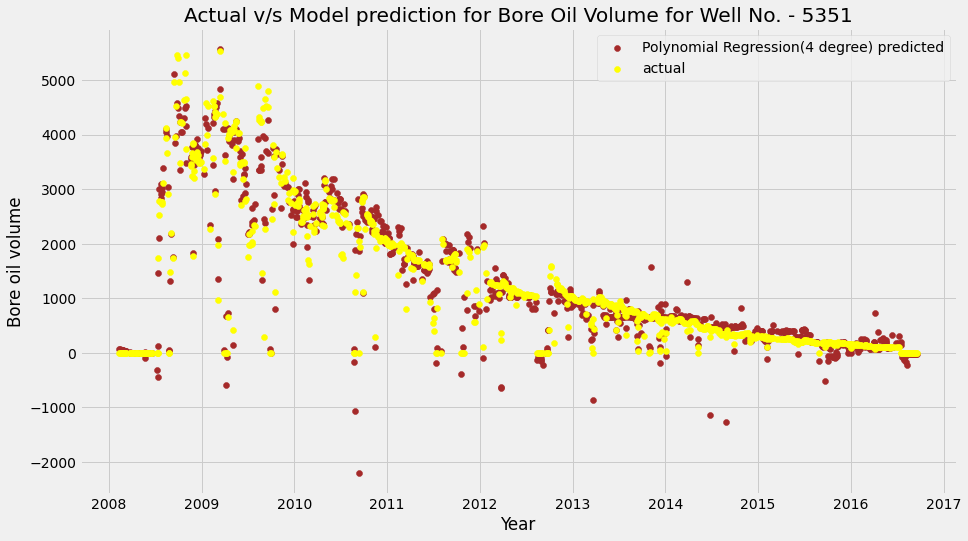

In [145]:
#Actual VS Model Prediction plot for Well No 5351

X_test_5351 = X_test[X_test["NPD_WELL_BORE_CODE"] == 5351]
y_test_5351 = y_test[y_test["NPD_WELL_BORE_CODE"] == 5351]
x_test_5351final = X_test_5351.drop(['DATEPRD',"NPD_WELL_BORE_CODE"],axis = 1)
x_pol_test_5351 = poly_reg.fit_transform(x_test_5351final)
y_poly = lin_reg.predict(x_pol_test_5351)

plt.style.use('fivethirtyeight')
plt.figure(figsize = (14,8))
plt.scatter(X_test_5351["DATEPRD"].tolist(),y_poly,label='Polynomial Regression(4 degree) predicted', color = 'brown')
plt.scatter(X_test_5351["DATEPRD"].tolist(),y_test_5351['BORE_OIL_VOL'],label='actual', color = 'yellow')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Bore oil volume")
plt.title('Actual v/s Model prediction for Bore Oil Volume for Well No. - 5351')

print("The R2 value for Polynomial regression(Degree - 4) for oil volume production in well 5351 is", lin_reg.score(x_pol_test_5351,y_poly))

The R2 value for Polynomial regression(Degree - 4) for oil volume production in well 7078 is 1.0


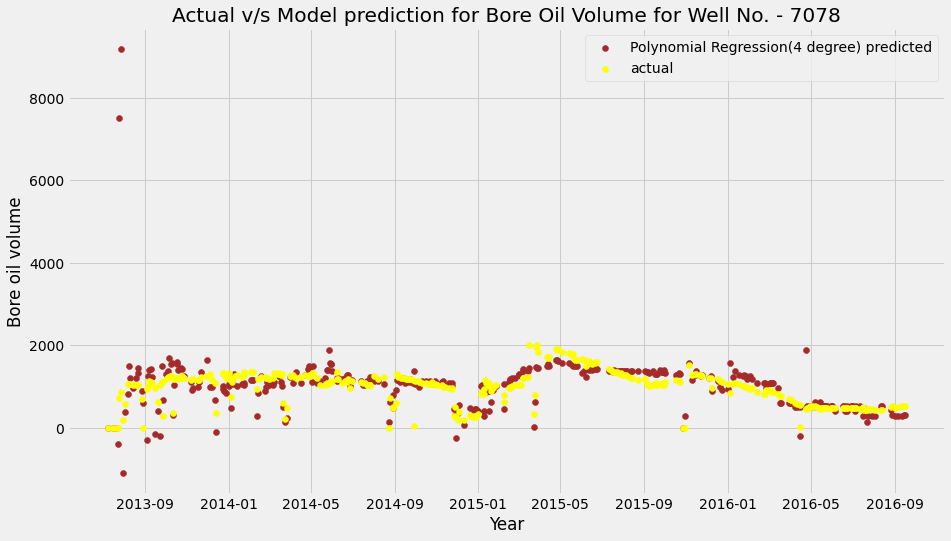

In [146]:
#Actual VS Model Prediction plot for Well No 7078

X_test_7078 = X_test[X_test["NPD_WELL_BORE_CODE"] == 7078]
y_test_7078 = y_test[y_test["NPD_WELL_BORE_CODE"] == 7078]
x_test_7078final = X_test_7078.drop(['DATEPRD',"NPD_WELL_BORE_CODE"], axis=1)
x_pol_test_7078 = poly_reg.fit_transform(x_test_7078final)
y_poly = lin_reg.predict(x_pol_test_7078)

plt.style.use('fivethirtyeight')
plt.figure(figsize = (14,8))
plt.scatter(X_test_7078["DATEPRD"].tolist(), y_poly, label='Polynomial Regression(4 degree) predicted', color = 'brown')
plt.scatter(X_test_7078["DATEPRD"].tolist(), y_test_7078['BORE_OIL_VOL'],label='actual', color = 'yellow')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Bore oil volume")
plt.title('Actual v/s Model prediction for Bore Oil Volume for Well No. - 7078')

print("The R2 value for Polynomial regression(Degree - 4) for oil volume production in well 7078 is", lin_reg.score(x_pol_test_7078,y_poly))

In [ ]:
# SAVIOUR